In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Шаг 1: загрузка данных
data = pd.read_excel('results.xls')

# Шаг 2: проверка данных
print(data.isnull().sum())

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64


In [3]:
# Шаг 3: подсчет количества пользователей в каждой группе
users_by_variant = data.groupby('VARIANT_NAME').agg({'USER_ID': 'nunique'})
print(users_by_variant)

              USER_ID
VARIANT_NAME         
control          3931
variant          3934


In [4]:
# Шаг 4: подсчет общей выручки и средней выручки по категориям пользователей
revenue_by_variant = data.groupby('VARIANT_NAME').agg({'REVENUE': ['sum', 'mean']})
print(revenue_by_variant)

             REVENUE          
                 sum      mean
VARIANT_NAME                  
control       643.00  0.129013
variant       351.47  0.070070


VARIANT_NAME
control    Axes(0.125,0.11;0.775x0.77)
variant    Axes(0.125,0.11;0.775x0.77)
Name: REVENUE, dtype: object

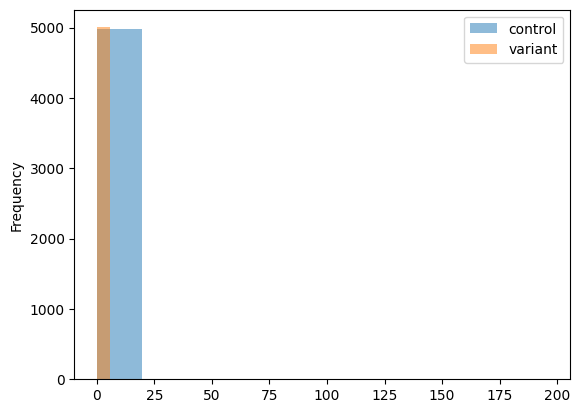

In [6]:
# Шаг 5: построение гистограммы распределения дохода
data.groupby('VARIANT_NAME')['REVENUE'].plot(kind='hist', alpha=0.5, legend=True)

In [7]:
# Шаг 6: проверка статистической значимости различий в доходе между группами
control_revenue = data[data['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = data[data['VARIANT_NAME'] == 'variant']['REVENUE']
p_value = ttest_ind(control_revenue, variant_revenue, equal_var=False)[1]
print('p-value:', p_value)

p-value: 0.20469713432410783
